<a href="https://colab.research.google.com/github/Barani-10/Data-Science-Training-Python-Part-1/blob/main/Barani.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

from sklearn.pipeline import Pipeline

from sklearn.model_selection import learning_curve, cross_val_score

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [ ]:
ball_tracking_data = pd.read_csv('/content/gdrive/My Drive/Barani_Cricet recruitment/data.csv')
ball_tracking_data.head()

,release_speed_kph,swing_angle,deviation,release_position_y,release_position_z,bounce_position_y,bounce_position_x,crease_position_y,crease_position_z,stumps_position_y,stumps_position_z,bounce_velocity_ratio_z,release_angle,drop_angle,bounce_angle,batting_hand,bowling_hand,bowling_type,runs,wicket
0,87.42,-1.64,2.44,0.78,2.12,0.27,5.35,0.23,0.46,0.21,0.49,-0.50,-2.81,-15.69,8.78,left,right,spin,1,0
1,141.37,0.83,-0.36,-0.76,2.10,-0.15,7.29,0.19,0.71,0.27,0.80,-0.59,-8.88,-12.34,7.90,right,right,pace,1,0
2,133.41,-0.80,0.16,0.30,1.83,0.15,3.78,0.11,0.21,0.10,0.27,-0.47,-4.72,-9.53,4.91,right,left,pace,1,0
3,98.07,1.00,NaN,-0.99,2.00,-0.33,1.80,-0.30,0.13,-0.24,0.30,-0.65,-0.78,-13.29,9.18,right,left,spin,0,0
4,89.12,0.81,-2.45,-0.62,2.15,0.13,4.03,0.18,0.45,0.21,0.57,-0.57,-0.72,-16.55,10.25,right,right,spin,1,0


In [ ]:
ball_tracking_data.shape

(200789, 20)

In [ ]:
ball_tracking_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200789 entries, 0 to 200788
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   release_speed_kph        200333 non-null  float64
 1   swing_angle              200534 non-null  float64
 2   deviation                194981 non-null  float64
 3   release_position_y       200527 non-null  float64
 4   release_position_z       200402 non-null  float64
 5   bounce_position_y        200465 non-null  float64
 6   bounce_position_x        200520 non-null  float64
 7   crease_position_y        200535 non-null  float64
 8   crease_position_z        200506 non-null  float64
 9   stumps_position_y        200523 non-null  float64
 10  stumps_position_z        200506 non-null  float64
 11  bounce_velocity_ratio_z  200496 non-null  float64
 12  release_angle            200533 non-null  float64
 13  drop_angle               200510 non-null  float64
 14  boun

- We can observe that we have 17 numericals and 3 objects attributes and that there some missing values

In [ ]:
ball_tracking_data.describe()

,release_speed_kph,swing_angle,deviation,release_position_y,release_position_z,bounce_position_y,bounce_position_x,crease_position_y,crease_position_z,stumps_position_y,stumps_position_z,bounce_velocity_ratio_z,release_angle,drop_angle,bounce_angle,runs,wicket
count,200333.000000,200534.000000,194981.000000,200527.000000,200402.000000,200465.000000,200520.000000,200535.000000,200506.000000,200523.000000,200506.000000,200496.000000,200533.000000,200510.000000,200509.000000,200789.000000,200789.000000
mean,113.314104,0.181257,-0.205346,-0.323727,2.003797,-0.141884,6.140859,-0.076211,0.668237,-0.059821,0.744015,-0.607788,-5.508132,-13.918712,9.529667,1.290763,0.049903
std,21.574559,1.225102,1.884765,0.636353,0.131172,0.336724,2.845008,0.341465,0.318014,0.366915,0.320691,0.077297,4.183278,2.615902,2.290649,1.626499,0.217745
min,40.200000,-24.500000,-24.080000,-3.000000,1.020000,-1.300000,-8.930000,-1.540000,0.000000,-1.800000,0.000000,-2.880000,-43.760000,-44.210000,0.020000,0.000000,0.000000
25%,90.810000,-0.480000,-0.860000,-0.750000,1.930000,-0.380000,4.470000,-0.290000,0.480000,-0.290000,0.560000,-0.650000,-8.340000,-15.790000,7.870000,0.000000,0.000000
50%,119.260000,0.190000,-0.040000,-0.570000,1.990000,-0.170000,6.120000,-0.080000,0.640000,-0.060000,0.720000,-0.610000,-5.270000,-13.950000,9.280000,1.000000,0.000000
75%,132.840000,0.880000,0.620000,0.160000,2.080000,0.080000,7.980000,0.140000,0.820000,0.170000,0.890000,-0.560000,-2.400000,-11.980000,10.970000,1.000000,0.000000
max,168.670000,24.360000,24.290000,2.980000,6.710000,1.300000,18.730000,1.900000,3.380000,1.950000,3.360000,0.000000,43.550000,-0.360000,44.220000,6.000000,1.000000


In [ ]:
# Summary statistics for objects attributes
ball_tracking_data.describe(include="object")

,batting_hand,bowling_hand,bowling_type
count,200786,200679,200416
unique,2,2,2
top,right,right,pace
freq,138050,144429,126026


- Count shows missing values
- Quite acceptable range for each features we will analyze it further


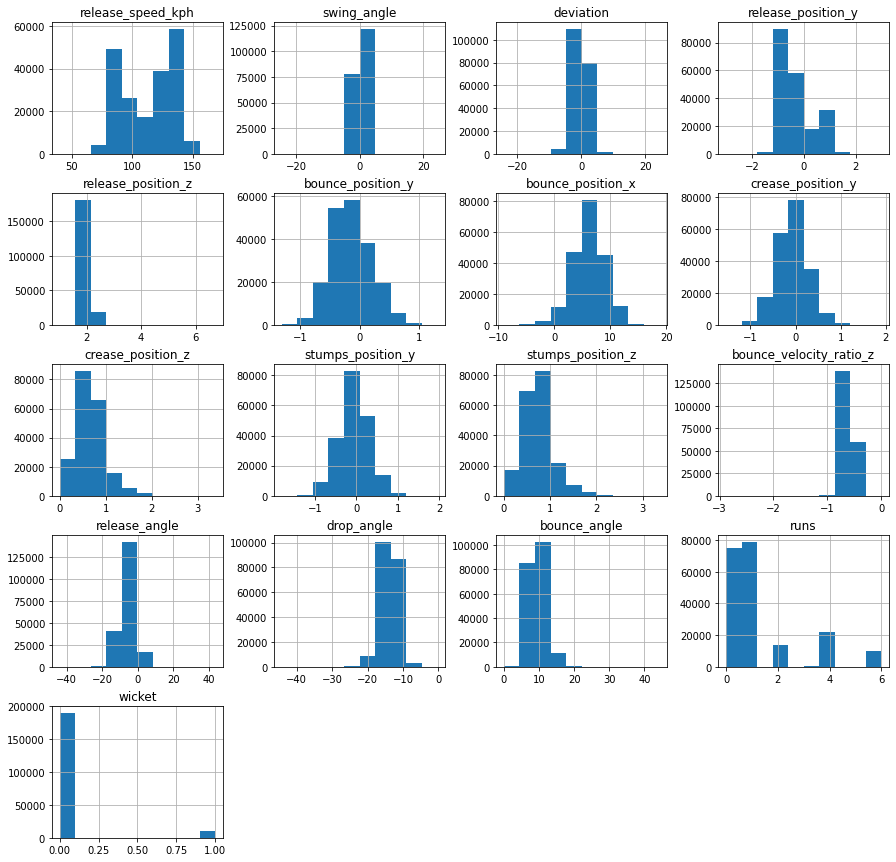

In [ ]:
# Let's visualise the distribution of the attributes
ball_tracking_data.hist(figsize=(15,15));

- There is no skewed attributes
- The wicket target has 2 possible values: either 0 or 1. It's a discrete numerical values so we will do a supervised classification model for this target. 
We see that almost all the measures taken has the label wicket=0, that could be a problem for our ML to predict wicket=1 measures.
- The runs target need to be studied with the value_counts 


In [ ]:
# Let's visualize wicket distribution further
ball_tracking_data.wicket.value_counts(normalize=True)

0    0.950097
1    0.049903
Name: wicket, dtype: float64

- Think It will be suitable to have more measures labeled wicket = 0 for a better performance of our model

In [ ]:
# Let's look at the runs target unique values
ball_tracking_data.runs.value_counts()

1    79101
0    74828
4    22295
2    13531
6    10218
3      780
5       36
Name: runs, dtype: int64

In [ ]:
# let's check for duplicates 
print("The shape of the data before dropping dupplicates :", ball_tracking_data.shape)
print("The numbers of duplicates rows is :", ball_tracking_data.duplicated(keep='first').sum())
# Remove duplicates rows
ball_tracking_data = ball_tracking_data.drop_duplicates(keep='first')
print("Shape after dropping duplicates :", ball_tracking_data.shape)

The shape of the data before dropping dupplicates : (200789, 20)
The numbers of duplicates rows is : 288
Shape after dropping duplicates : (200501, 20)


In [ ]:
# let's visualise our targets


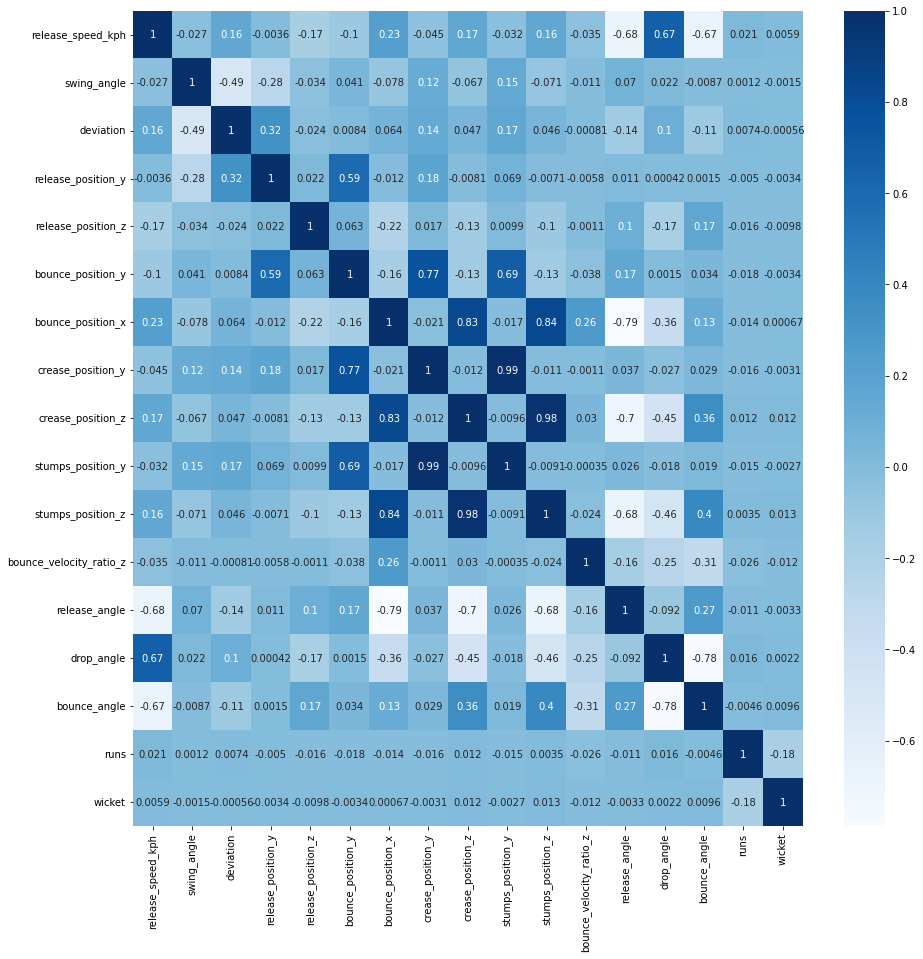

In [ ]:
# Let's look at the correlation between variables
corr_matrix = ball_tracking_data.corr()

# plot an heatmap of the correlation matrix
fig = plt.figure(figsize = (15,15))
sns.heatmap(corr_matrix, cmap= "Blues", annot = True)
plt.show()

- wicket and runs attributes are more correlated to each other than other attributes. they are negatively correlated

In [ ]:
# Let's use a function to get the ranking of the more correlated attributes
def identify_highly_correlated_features(df, correlation_threshold):
    """
    This definition can be used to identify highly correlated features
    
    @param df pandas DataFrame
    @param correlation_threshold int 
    
    @return a DataFrame with highly correlated features 
    """
    
    corr_matrix = df.corr().abs() # calculate the correlation matrix with 
    high_corr_var = np.where(corr_matrix >= correlation_threshold) # identify variables that have correlations above defined threshold
    high_corr_var = [(corr_matrix.index[x], corr_matrix.columns[y], round(corr_matrix.iloc[x, y], 2))
                         for x, y in zip(*high_corr_var) if x != y and x < y] # identify pairs of highly correlated variables
    
    high_corr_var_df = pd.DataFrame(high_corr_var).rename(columns = {0: 'corr_feature',
                                                                     1: 'drop_feature',
                                                                     2: 'correlation_values'})

    return high_corr_var_df.sort_values(by = 'correlation_values', ascending = False)

# Apply the function
identify_highly_correlated_features(ball_tracking_data, 0.95)

,corr_feature,drop_feature,correlation_values
0,crease_position_y,stumps_position_y,0.99
1,crease_position_z,stumps_position_z,0.98


In [ ]:
# Let's drop highly correlated attributes
print("Data shape before :", ball_tracking_data.shape)
to_drop = ["crease_position_y", "crease_position_z"] # I choose to drop "crease_position" because "stumps_position" is more correlated to our targets
ball_tracking_data = ball_tracking_data.drop(to_drop, axis=1)
print("Data shape after :", ball_tracking_data.shape)

Data shape before : (200501, 20)
Data shape after : (200501, 18)


### Handling missing values

In [ ]:
# Let's use a predefine function to have the percentage of missing values per attributes
# function
def identify_missing_data(df):
    """
    This function is used to identify missing data
    
    @param df pandas DataFrame
    
    @return a DataFrame with the percentage of missing data for every feature and the data types
    """
    percent_missing = df.isnull().mean()
    
    missing_value_df = pd.DataFrame(percent_missing).reset_index() # convert to DataFrame
    missing_value_df = missing_value_df.rename(columns = {"index" : "feature",
                                                                0 : "percent_missing"}) # rename columns

    missing_value_df = missing_value_df.sort_values(by = ['percent_missing'], ascending = False) # sort the values
    
    data_types_df = pd.DataFrame(df.dtypes).reset_index().rename(columns = {"index" : "feature",
                                                                0 : "data_type"}) # rename columns
    
    missing_value_df = missing_value_df.merge(data_types_df, on = "feature") # join the dataframe with datatype
    
    missing_value_df.percent_missing = round(missing_value_df.percent_missing*100, 2) # format the percent_missing
    
    return missing_value_df

# Apply the function 
missing_df = identify_missing_data(ball_tracking_data)
missing_df[missing_df["percent_missing"] > 0] 

,feature,percent_missing,data_type
0,deviation,2.80,float64
1,bowling_type,0.19,object
2,release_speed_kph,0.14,float64
3,release_position_z,0.10,float64
4,bounce_position_y,0.07,float64
5,bounce_velocity_ratio_z,0.06,float64
6,bowling_hand,0.05,object
7,stumps_position_z,0.05,float64
8,bounce_angle,0.05,float64
9,drop_angle,0.05,float64


In [ ]:
missing_df[missing_df["percent_missing"] > 0].sum()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


feature            deviationbowling_typerelease_speed_kphrelease_...
percent_missing                                                 3.77
dtype: object

All the missing values represent less than 4% of the dataset. It's possible to use Fillna() method but since missng row are not significant, I'm going to drop these rows.

In [ ]:
# Drop the Na Values
ball_tracking_data_clean = ball_tracking_data.dropna(how='any', axis=0)
print(" Shape before:", ball_tracking_data.shape)
print(" Shape after:", ball_tracking_data_clean.shape)
# Check of missing values again
missing_df = identify_missing_data(ball_tracking_data_clean)
missing_df[missing_df["percent_missing"] > 0] 

 Shape before: (200501, 18)
 Shape after: (193883, 18)


,feature,percent_missing,data_type


- There is no missing values anymore

In [ ]:
ball_tracking_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193883 entries, 0 to 200788
Data columns (total 18 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   release_speed_kph        193883 non-null  float64
 1   swing_angle              193883 non-null  float64
 2   deviation                193883 non-null  float64
 3   release_position_y       193883 non-null  float64
 4   release_position_z       193883 non-null  float64
 5   bounce_position_y        193883 non-null  float64
 6   bounce_position_x        193883 non-null  float64
 7   stumps_position_y        193883 non-null  float64
 8   stumps_position_z        193883 non-null  float64
 9   bounce_velocity_ratio_z  193883 non-null  float64
 10  release_angle            193883 non-null  float64
 11  drop_angle               193883 non-null  float64
 12  bounce_angle             193883 non-null  float64
 13  batting_hand             193883 non-null  object 
 14  bowl

### Let's look at the outliers

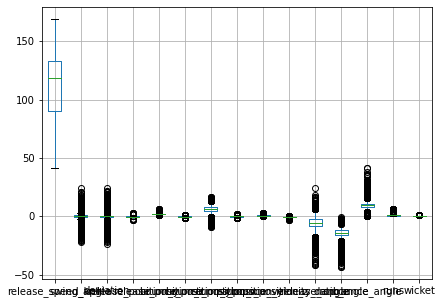

In [ ]:
ball_tracking_data_clean.boxplot(figsize=(7,5))

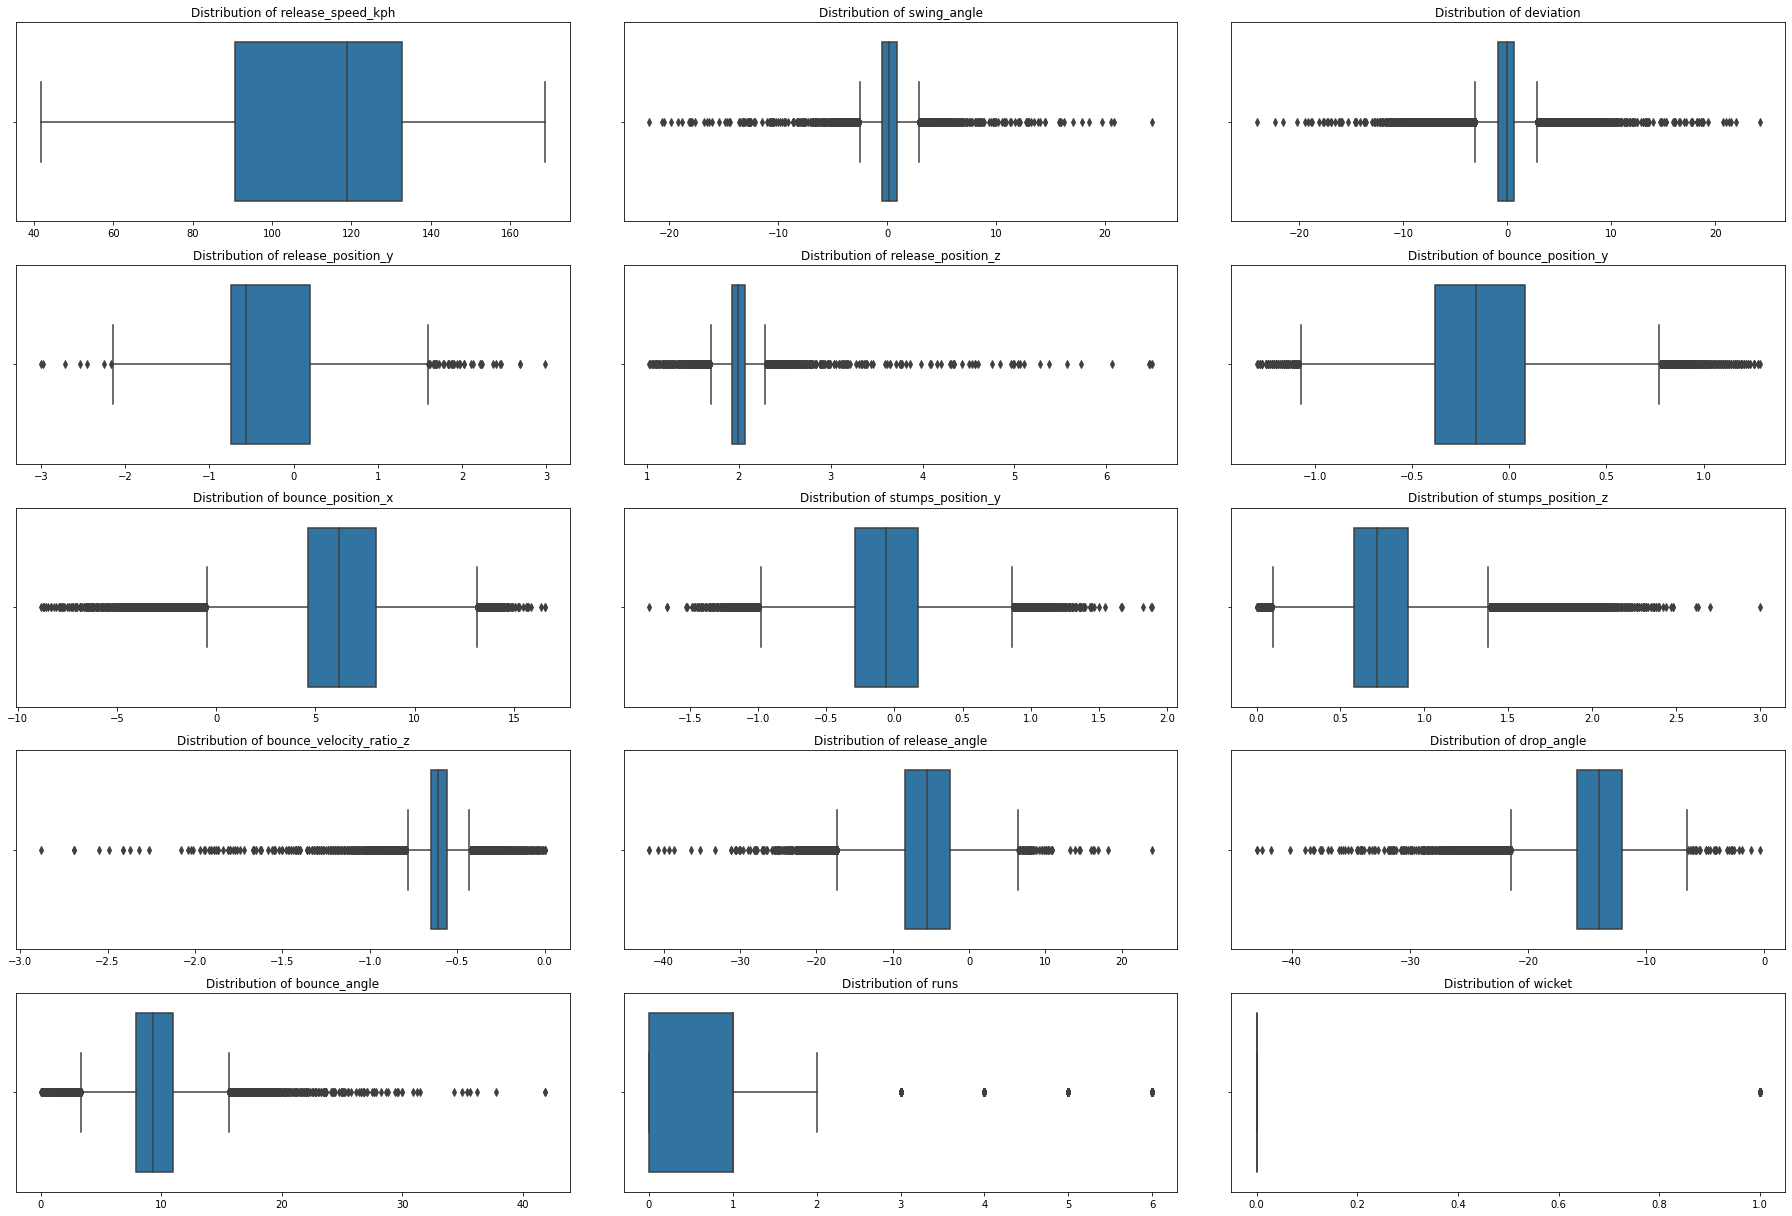

In [ ]:
# Let's visualise the box plot individualy
# Code used in class
# visualize distribution to detect outliers per column
fig = plt.figure(figsize=(25, 17)) # size of plot
ball_tracking_clean_count = ball_tracking_data_clean.select_dtypes([int,float]) # store all continous variable (integer or float) columns in ball_tracking_clean_cont variable

for i, columns in enumerate(ball_tracking_clean_count.columns, 1): 
    ax = plt.subplot(5,3,i) # creates 3 subplots in one single row
    sns.boxplot(data = ball_tracking_clean_count, x=ball_tracking_clean_count[columns]) # creates box plots for each feature in ball_tracking_data_cleandataset
    ax.set_xlabel(None) # removes the labels on x-axis
    ax.set_title(f'Distribution of {columns}') # adds title to each subplot
    
plt.tight_layout(w_pad=5) # adds padding between the subplots
plt.show() # displays the plots

- We observe some outliers but I prefer to keep It from now. It can be some steps to go through for features tuning

## Features Engineering

In [ ]:
ball_tracking_data_clean.describe(include='object')

,batting_hand,bowling_hand,bowling_type
count,193883,193883,193883
unique,2,2,2
top,right,right,pace
freq,133046,139182,121050


In [ ]:
ball_tracking_data_clean.select_dtypes(object).columns

Index(['batting_hand', 'bowling_hand', 'bowling_type'], dtype='object')

In [ ]:
# Let's encode our categorical attributes
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Encode each object features
for col in ball_tracking_data_clean.select_dtypes(object).columns:
  ball_tracking_data_clean[col] = label_encoder.fit_transform(ball_tracking_data_clean[col])
  print(col, "unique values:", ball_tracking_data_clean[col].unique())


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


batting_hand unique values: [0 1]
bowling_hand unique values: [1 0]
bowling_type unique values: [1 0]


In [ ]:
# Check for categorical attributes
ball_tracking_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193883 entries, 0 to 200788
Data columns (total 18 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   release_speed_kph        193883 non-null  float64
 1   swing_angle              193883 non-null  float64
 2   deviation                193883 non-null  float64
 3   release_position_y       193883 non-null  float64
 4   release_position_z       193883 non-null  float64
 5   bounce_position_y        193883 non-null  float64
 6   bounce_position_x        193883 non-null  float64
 7   stumps_position_y        193883 non-null  float64
 8   stumps_position_z        193883 non-null  float64
 9   bounce_velocity_ratio_z  193883 non-null  float64
 10  release_angle            193883 non-null  float64
 11  drop_angle               193883 non-null  float64
 12  bounce_angle             193883 non-null  float64
 13  batting_hand             193883 non-null  int64  
 14  bowl

- We remain with numerical data

In [ ]:
ball_tracking_data_clean.head()

,release_speed_kph,swing_angle,deviation,release_position_y,release_position_z,bounce_position_y,bounce_position_x,stumps_position_y,stumps_position_z,bounce_velocity_ratio_z,release_angle,drop_angle,bounce_angle,batting_hand,bowling_hand,bowling_type,runs,wicket
0,87.42,-1.64,2.44,0.78,2.12,0.27,5.35,0.21,0.49,-0.50,-2.81,-15.69,8.78,0,1,1,1,0
1,141.37,0.83,-0.36,-0.76,2.10,-0.15,7.29,0.27,0.80,-0.59,-8.88,-12.34,7.90,1,1,0,1,0
2,133.41,-0.80,0.16,0.30,1.83,0.15,3.78,0.10,0.27,-0.47,-4.72,-9.53,4.91,1,0,0,1,0
4,89.12,0.81,-2.45,-0.62,2.15,0.13,4.03,0.21,0.57,-0.57,-0.72,-16.55,10.25,1,1,1,1,0
6,96.64,0.32,0.71,-0.84,2.05,-0.01,5.36,0.42,0.57,-0.52,-2.52,-15.39,8.76,1,0,1,0,0


In [ ]:
tracking = ball_tracking_data_clean.copy()

### Function I'm going to use for the differents classification models and split the data

In [ ]:
# Set up classification report
def evaluate_model(model, y_true, y_pred):
    print('Model: ', model)
    print(classification_report(y_true, y_pred))
    print('\n')

In [ ]:
def plot_confusion_matrix(model, title, y_true, y_pred, encoder):
    plt.figure(figsize=(10, 8))
    xticks = encoder.inverse_transform(model.classes_)
    yticks = encoder.inverse_transform(model.classes_)
    cm = confusion_matrix(y_true, y_pred)
    norm_cm = cm / cm.sum(axis=1).reshape(-1, 1)
    sns.heatmap(norm_cm, annot=True, cmap='Blues', xticklabels=xticks, yticklabels=yticks,
                vmin=0, vmax=1)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()


In [ ]:
def print_5(y_pred, y_test):
    print("first five predicted values:", y_pred[0:5])
    print("first five actual values:", list(y_test[0:5]))

In [ ]:
def print_scores(model_name, y_pred, y_test):
    # Evaluate the Decision Tree Model on Test Data
    # the evaluation metrics for the model on the test set
    print("Results of the Decision Tree Model:")
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy Score:", round(accuracy, 2))
    precision = precision_score(y_test, y_pred, average='macro')
    print("Precision Score:", round(precision, 2))
    recall = recall_score(y_test, y_pred, average='macro')
    print("Recall Score:", round(recall, 2))
    f1 = f1_score(y_test, y_pred, average='macro')
    print("F1 Score:", round(f1, 2))
    return pd.DataFrame(index=["Accuracy", "Precision", "Recall", "F1"],
                           data=[accuracy, precision, recall, f1], columns=[model_name])

In [ ]:
def feature_importance_plot(model, X_train, n=10):
    """Plots feature importance - this only works for Decision Tree based Models"""
    plt.figure(figsize=(8, 5)) # set figure size
    feat_importances = pd.Series(model.feature_importances_,
                                 index = X_train.columns)
    feat_importances.nlargest(n).plot(kind = 'bar')
    plt.title(f"Top {n} Features")
    plt.show()

In [ ]:
def learning_curve_plot(model, X_train, y_train, scoring):
    """Plots learning curves for model validation
    
    @param models - list of models we are interested in evaluating
    @param X_train - the training features
    @param y_train - the target
    
    @returns a plot of the learning curve
    """
    
    plt.figure(figsize=(5, 5)) # set figure size
    train_sizes, train_scores, test_scores = learning_curve(
        model,
        X_train,
        y_train,
        # Number of folds in cross-validation
        cv = 5,
        # Evaluation metric
        scoring = scoring,
        # Use all computer cores
        n_jobs = -1,
        shuffle = True,
        # 5 different sizes of the training set
        train_sizes = np.linspace(0.01, 1.0, 5))

    # Create means and standard deviations of training set scores
    train_mean = np.mean(train_scores, axis = 1)
    train_std = np.std(train_scores, axis = 1)

    # Create means and standard deviations of test set scores
    test_mean = np.mean(test_scores, axis = 1)
    test_std = np.std(test_scores, axis = 1)

    # Draw lines
    plt.plot(train_sizes, train_mean, '--', color = "#111111", label = "Training score")
    plt.plot(train_sizes, test_mean, color = "#111111", label = "Cross-validation score")

    # Draw bands
    # plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color = "#DDDDDD")
    # plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color = "#DDDDDD")

    # Create plot
    plt.title("Learning Curves")
    plt.xlabel("Training Set Size"), plt.ylabel("Error"), plt.legend(loc = "best")
    plt.tight_layout()
    
    plt.show()

## Binary Classification Models, Target: Wicket

In [ ]:
# Define target and features variables
target = tracking.wicket #y
features = tracking.drop(['wicket'], axis = 1) #X
print(target.shape)
print(features.shape)

(193883,)
(193883, 17)


In [ ]:
# Split the data to training and test 
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.3, 
                                                random_state = 42)

## I going to Implement 3 models: DecisionTree, RandomForest, Xgboost

In [ ]:
# Set up pipelines to simplify model fitting
rf = Pipeline([#('tfidf', transformer),
                ('scaler', StandardScaler(with_mean=False)),
               ('clf', RandomForestClassifier(max_depth=5,
                                              n_estimators=100,
                                              random_state=42))])
dt = Pipeline([#('tfidf', transformer),
                ('scaler', StandardScaler(with_mean=False)),
               ('clf', DecisionTreeClassifier(max_depth=5,
                                              random_state=42))])
xgb = Pipeline([#('tfidf', transformer),
                ('scaler', StandardScaler(with_mean=False)),
               ('clf', XGBClassifier(max_depth=5,
                                              n_estimators=100,
                                              random_state=42))])

### Decision Tree

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
# Make predictions and call this variable y_pred_dt
y_pred_dt = dt.predict(X_test)

In [ ]:
# Apply the function for the 5 first prediction of the Decicsion Tree model
print_5(y_pred_dt,y_test)

first five predicted values: [0 0 0 0 0]
first five actual values: [0, 0, 0, 0, 0]


- 100% precision for the first for the first five rows

In [ ]:
#print scores of decision tree model
dt_scores = print_scores("Decision tree", y_pred_dt, y_test)

Results of the Decision Tree Model:
Accuracy Score: 0.91
Precision Score: 0.57
Recall Score: 0.58
F1 Score: 0.58


In [ ]:
# Model performances
#print scores of model for each wicket label
evaluate_model(dt, y_test, y_pred_dt)

Model:  DecisionTreeClassifier()
              precision    recall  f1-score   support

           0       0.96      0.95      0.96     55369
           1       0.18      0.22      0.20      2796

    accuracy                           0.91     58165
   macro avg       0.57      0.58      0.58     58165
weighted avg       0.92      0.91      0.92     58165





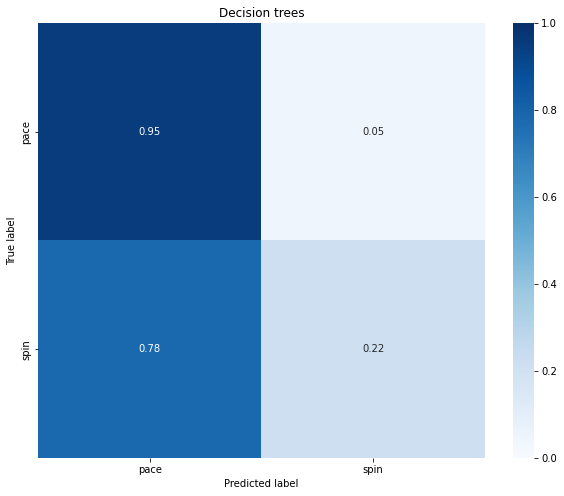

In [ ]:
# Let's plot the confusion matrix for decision tree
plot_confusion_matrix(dt, "Decision trees", y_test, y_pred_dt, encoder=label_encoder)

### Random Forest

In [ ]:
# Build the model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
# Make predictions and call this variable y_pred_dt
y_pred_rf = rf.predict(X_test)

In [ ]:
# Optional: Print the first five predicted vs actual values
print_5(y_pred_rf, y_test)

first five predicted values: [0 0 0 0 0]
first five actual values: [0, 0, 0, 0, 0]


In [ ]:
# Print scores of random forest model
rf_scores = print_scores("Random forest", y_pred_rf, y_test)

Results of the Decision Tree Model:
Accuracy Score: 0.95
Precision Score: 0.73
Recall Score: 0.5
F1 Score: 0.5


In [ ]:
# Print scores of model for each genre
evaluate_model(rf, y_test, y_pred_rf)

Model:  RandomForestClassifier()
              precision    recall  f1-score   support

           0       0.95      1.00      0.98     55369
           1       0.50      0.01      0.02      2796

    accuracy                           0.95     58165
   macro avg       0.73      0.50      0.50     58165
weighted avg       0.93      0.95      0.93     58165





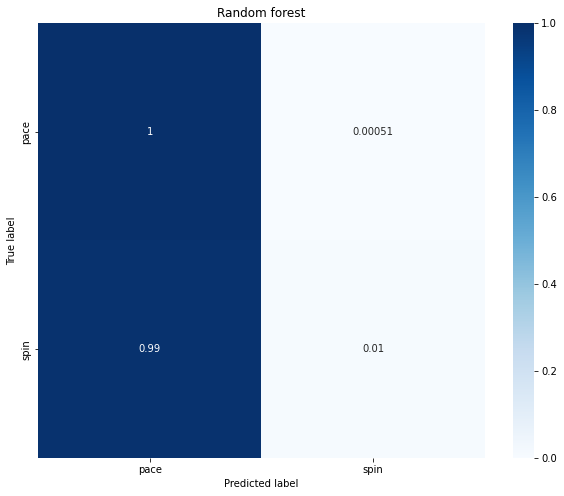

In [ ]:
# Plot confusion matrix
plot_confusion_matrix(rf, "Random forest", y_test, y_pred_rf, encoder=label_encoder)

In [ ]:
# Build the model
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

XGBClassifier()

In [ ]:
# Make predictions and call this variable y_pred_dt
y_pred_xgb = xgb.predict(X_test)

In [ ]:
# Print the first five predicted vs actual values
print_5(y_pred_xgb, y_test)

first five predicted values: [0 0 0 0 0]
first five actual values: [0, 0, 0, 0, 0]


In [ ]:
# Print scores of XGBoost model
xgb_scores = print_scores("XGBoost", y_pred_xgb, y_test)

Results of the Decision Tree Model:
Accuracy Score: 0.95
Precision Score: 0.48
Recall Score: 0.5
F1 Score: 0.49


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Print scores of model for each wicket label
evaluate_model(xgb, y_test, y_pred_xgb)

Model:  XGBClassifier()
              precision    recall  f1-score   support

           0       0.95      1.00      0.98     55369
           1       0.00      0.00      0.00      2796

    accuracy                           0.95     58165
   macro avg       0.48      0.50      0.49     58165
weighted avg       0.91      0.95      0.93     58165





/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


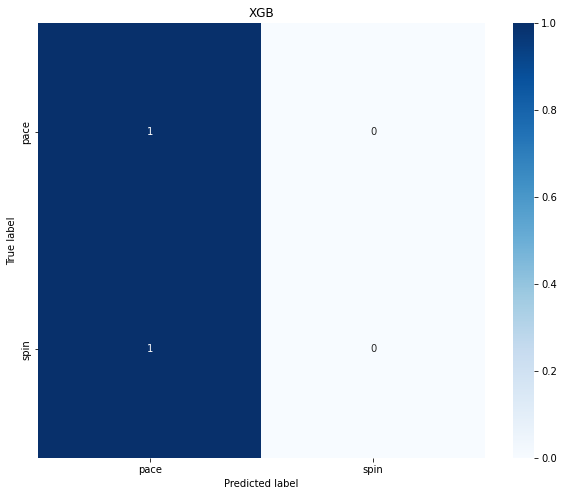

In [ ]:
# Plot confusion matrix
plot_confusion_matrix(dt, "XGB", y_test, y_pred_xgb, encoder=label_encoder)

## Evaluating and Explaining Model Performances

In [ ]:
# Df of all scores
all_scores = pd.concat([dt_scores, rf_scores, xgb_scores], axis=1)
all_scores

,Decision tree,Random forest,XGBoost
Accuracy,0.914932,0.951930,0.951930
Precision,0.569883,0.726183,0.475965
Recall,0.583124,0.504754,0.500000
F1,0.575660,0.497498,0.487687


### Conlusion: The Random forest is the best performing model

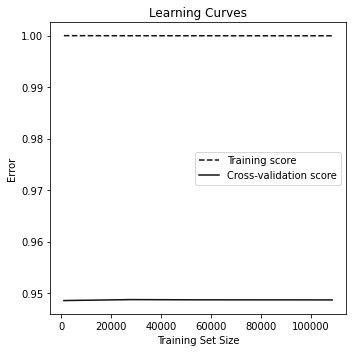

In [ ]:
# Let's plot the learning curves 
learning_curve_plot(rf, X_train, y_train, "accuracy")

Our model is overfitting the variance is high

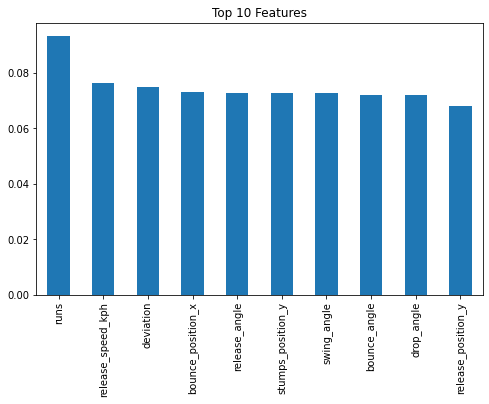

In [ ]:
# Feature importance plot
feature_importance_plot(rf, X_train)

## Multi-class classification, Target: runs

In [ ]:
#### Set the new target and features
target = tracking.runs #y
features = tracking.drop(['runs'], axis = 1) #X
print(target.shape)
print(features.shape)


(193883,)
(193883, 17)


In [ ]:
# Split the data to training and test 
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.3, 
                                                random_state = 42)

## I going to Implement 3 models: DecisionTree, RandomForest, Xgboost

### Decision Tree

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
# Make predictions and call this variable y_pred_dt
y_pred_dt = dt.predict(X_test)

In [ ]:
# Apply the function for the 5 first prediction of the Decicsion Tree model
print_5(y_pred_dt,y_test)

first five predicted values: [2 4 4 2 0]
first five actual values: [6, 1, 1, 0, 6]


In [ ]:
# Print scores of decision tree model
dt_scores = print_scores("Decision tree", y_pred_dt, y_test)

Results of the Decision Tree Model:
Accuracy Score: 0.36
Precision Score: 0.17
Recall Score: 0.17
F1 Score: 0.17


In [ ]:
# Model performances
#print scores of model for each wicket label
evaluate_model(dt, y_test, y_pred_dt)

Model:  DecisionTreeClassifier()
              precision    recall  f1-score   support

           0       0.46      0.46      0.46     21630
           1       0.44      0.43      0.43     22813
           2       0.08      0.08      0.08      3995
           3       0.00      0.00      0.00       233
           4       0.14      0.15      0.15      6458
           5       0.00      0.00      0.00         6
           6       0.07      0.07      0.07      3030

    accuracy                           0.36     58165
   macro avg       0.17      0.17      0.17     58165
weighted avg       0.37      0.36      0.37     58165





In [ ]:
# Let's plot the confusion matrix for decision tree
plot_confusion_matrix(dt,"Decision trees", y_test, y_pred_dt, encoder=label_encoder)

ValueError: ignored

<Figure size 720x576 with 0 Axes>

### Random Forest

In [ ]:
# Build the model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
# Make predictions and call this variable y_pred_dt
y_pred_rf = rf.predict(X_test)

In [ ]:
# Optional: Print the first five predicted vs actual values
print_5(y_pred_rf, y_test)

first five predicted values: [1 0 1 0 0]
first five actual values: [6, 1, 1, 0, 6]


In [ ]:
# Print scores of random forest model
rf_scores = print_scores("Random forest", y_pred_rf, y_test)

Results of the Decision Tree Model:
Accuracy Score: 0.47
Precision Score: 0.19
Recall Score: 0.18
F1 Score: 0.16


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Print scores of model for each genre
evaluate_model(rf, y_test, y_pred_rf)

Model:  RandomForestClassifier()


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.50      0.54      0.52     21630
           1       0.46      0.69      0.55     22813
           2       0.16      0.00      0.00      3995
           3       0.00      0.00      0.00       233
           4       0.21      0.02      0.04      6458
           5       0.00      0.00      0.00         6
           6       0.03      0.00      0.00      3030

    accuracy                           0.47     58165
   macro avg       0.19      0.18      0.16     58165
weighted avg       0.40      0.47      0.41     58165





/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
plot_confusion_matrix(rf, "Random forest", y_test, y_pred_rf, encoder=label_encoder)

ValueError: ignored

<Figure size 720x576 with 0 Axes>

### XGBoost model

In [ ]:
# Build the model
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

XGBClassifier(objective='multi:softprob')

In [ ]:
# Make predictions and call this variable y_pred_dt
y_pred_xgb = xgb.predict(X_test)

In [ ]:
# Print the first five predicted vs actual values
print_5(y_pred_xgb, y_test)

first five predicted values: [1 0 1 1 1]
first five actual values: [6, 1, 1, 0, 6]


In [ ]:
# Print scores of XGBoost model
xgb_scores = print_scores("XGBoost", y_pred_xgb, y_test)

Results of the Decision Tree Model:
Accuracy Score: 0.48
Precision Score: 0.18
Recall Score: 0.18
F1 Score: 0.15


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Print scores of model for each wicket label
evaluate_model(xgb, y_test, y_pred_xgb)

Model:  XGBClassifier(objective='multi:softprob')
              precision    recall  f1-score   support

           0       0.53      0.45      0.48     21630
           1       0.45      0.80      0.58     22813
           2       0.00      0.00      0.00      3995
           3       0.00      0.00      0.00       233
           4       0.26      0.00      0.00      6458
           5       0.00      0.00      0.00         6
           6       0.00      0.00      0.00      3030

    accuracy                           0.48     58165
   macro avg       0.18      0.18      0.15     58165
weighted avg       0.40      0.48      0.41     58165





/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Plot confusion matrix
plot_confusion_matrix(xgb, "XGB", y_test, y_pred_xgb, encoder=label_encoder)

ValueError: ignored

<Figure size 720x576 with 0 Axes>

## Evaluating and Explaining Model Performances

In [ ]:
# Df of all scores
all_scores = pd.concat([dt_scores, rf_scores, xgb_scores], axis=1)
all_scores

,Decision tree,Random forest,XGBoost
Accuracy,0.364618,0.470867,0.478123
Precision,0.170332,0.194987,0.177674
Recall,0.170483,0.178297,0.177558
F1,0.170394,0.159290,0.152137


## Conclusion: The XGboost model is the best model

In [ ]:
# Let's plot the learning curves 
learning_curve_plot(xgb, X_train, y_train, "accuracy")

/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


In [ ]:
# Feature importance plot
feature_importance_plot(xgb, X_train)